In [1]:
%load_ext autoreload
%autoreload 2
import emma_util
import nest_asyncio
nest_asyncio.apply()
import multiprocessing
multiprocessing.set_start_method("fork")
import pandas as pd
import stan
import numpy as np
from scipy.stats import pearsonr

from scipy.special import expit
import matplotlib.pyplot as plt
import arviz as az
import random


# Emma notes (8/22):

In general, let's build complexity iteratively. Start by getting reasonable results without worrying about ICAR prior/smoothing. Then use standard ICAR prior (with weight 0.5). Then use full CAR (maybe). Data generation code is reviewed + model without proper CAR prior is reviewed. Another thing it might be nice to implement at some point is using the information about where the annotated images are (i.e., what Census tracts). Could incorporate this as a multinomial (potentially?) 

Model with simple L2 smoothing (or no smoothing at all - stan_code_with_weighted_ICAR_prior):

1. Consistently recovers parameters for realistic parameter settings (with no smoothing)
2. Reviewed Stan code and looks good. 
3. ALso implemented L2 regularization for adjacent Census tracts. This isn't actually the "proper" way to do it, but might be useful on real data. Haven't tested how this performs. 

Model wih full CAR prior (stan_code_proper_car_prior):

1. Haven't reviewed this or verified it recovers correct params (recently; I think I did a while ago). When you do review, don't need to re-review all the Bayesian conditioning math; it should be pretty similar to the old code. 


empirical_p_y 0.044222637555178405
empirical_p_yhat 0.034128448431729616
p_y_hat_1_given_y_1 0.3534012031138328
p_y_hat_1_given_y_0 0.019370570971356568
p_y_1_given_y_hat_1 0.45792686263279314
p_y_1_given_y_hat_0 0.029604665539515348
number of annotated classified negative which were positive: 16/500
number of annotated classified positive which were positive: 235/500
dict_keys(['N', 'N_edges', 'node1', 'node2', 'n_images_by_area', 'n_classified_positive_by_area', 'total_annotated_classified_negative', 'total_annotated_classified_positive', 'total_annotated_classified_negative_true_positive', 'total_annotated_classified_positive_true_positive', 'use_ICAR_prior', 'ICAR_prior_weight'])
Building...



Building: found in cache, done.Messages from stanc:
Sampling:   0%
Sampling:   0% (1/10000)
Sampling:   0% (2/10000)
Sampling:   0% (3/10000)
Sampling:   0% (4/10000)
Sampling:   2% (203/10000)
Sampling:   3% (302/10000)
Sampling:   5% (501/10000)
Sampling:   6% (601/10000)
Sampling:   8% (800/10000)
Sampling:  10% (1000/10000)
Sampling:  11% (1100/10000)
Sampling:  14% (1400/10000)
Sampling:  16% (1600/10000)
Sampling:  18% (1800/10000)
Sampling:  19% (1900/10000)
Sampling:  21% (2100/10000)
Sampling:  23% (2300/10000)
Sampling:  25% (2500/10000)
Sampling:  31% (3101/10000)
Sampling:  48% (4801/10000)
Sampling:  67% (6701/10000)
Sampling:  84% (8401/10000)
Sampling:  99% (9900/10000)
Sampling: 100% (10000/10000)
Sampling: 100% (10000/10000), done.
Messages received during sampling:
  Gradient evaluation took 9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.9 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metro

                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
p_y_hat_1_given_y_1  0.317  0.046   0.240    0.406      0.005    0.003   
p_y_hat_1_given_y_0  0.019  0.000   0.018    0.020      0.000    0.000   
phi_offset          -3.343  0.169  -3.657   -3.039      0.019    0.013   
p_y_1_given_y_hat_1  0.470  0.011   0.449    0.491      0.001    0.000   
p_y_1_given_y_hat_0  0.037  0.008   0.022    0.051      0.001    0.001   
...                    ...    ...     ...      ...        ...      ...   
p_y[995]             0.012  0.008   0.001    0.026      0.000    0.000   
p_y[996]             0.012  0.008   0.001    0.026      0.000    0.000   
p_y[997]             0.018  0.011   0.002    0.037      0.000    0.000   
p_y[998]             0.033  0.016   0.005    0.062      0.001    0.000   
p_y[999]             0.017  0.010   0.002    0.036      0.000    0.000   

                     ess_bulk  ess_tail  r_hat  
p_y_hat_1_given_y_1      83.0     158.0   1.03  
p_y_hat_1_giv

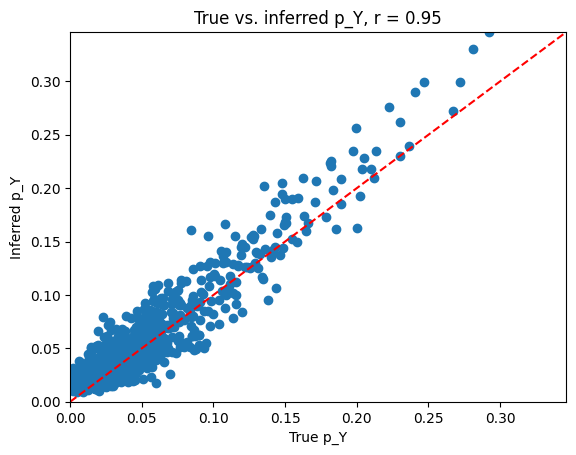

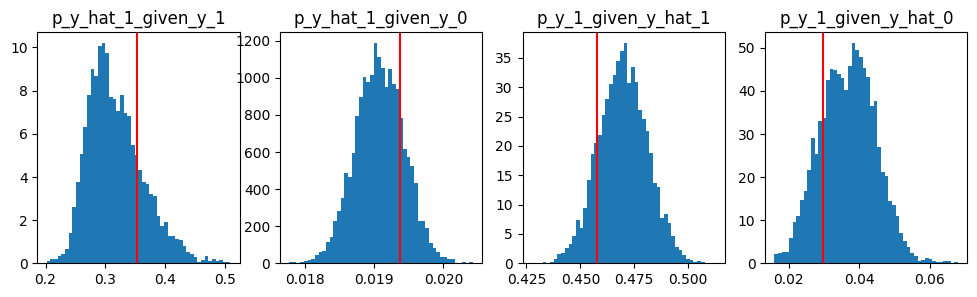

empirical_p_y 0.050200751016751914
empirical_p_yhat 0.03616317618501086
p_y_hat_1_given_y_1 0.3599713895366923
p_y_hat_1_given_y_0 0.019361270286723742
p_y_1_given_y_hat_1 0.49970262586547415
p_y_1_given_y_hat_0 0.03333543201876423
number of annotated classified negative which were positive: 17/500
number of annotated classified positive which were positive: 257/500
dict_keys(['N', 'N_edges', 'node1', 'node2', 'n_images_by_area', 'n_classified_positive_by_area', 'total_annotated_classified_negative', 'total_annotated_classified_positive', 'total_annotated_classified_negative_true_positive', 'total_annotated_classified_positive_true_positive', 'use_ICAR_prior', 'ICAR_prior_weight'])
Building...



Building: found in cache, done.Messages from stanc:
Sampling:   0%
Sampling:   0% (1/10000)
Sampling:   0% (2/10000)
Sampling:   0% (3/10000)
Sampling:   0% (4/10000)
Sampling:   1% (103/10000)
Sampling:   2% (202/10000)
Sampling:   4% (401/10000)
Sampling:   6% (600/10000)
Sampling:   9% (900/10000)
Sampling:  10% (1000/10000)
Sampling:  12% (1200/10000)
Sampling:  13% (1300/10000)
Sampling:  14% (1400/10000)
Sampling:  16% (1600/10000)
Sampling:  17% (1700/10000)
Sampling:  18% (1800/10000)
Sampling:  20% (2000/10000)
Sampling:  21% (2100/10000)
Sampling:  22% (2200/10000)
Sampling:  23% (2300/10000)
Sampling:  25% (2500/10000)
Sampling:  27% (2700/10000)

AttributeError: 'NoneType' object has no attribute 'to_frame'

In [2]:
icar_prior_setting = 'none'
annotations_have_locations = False
use_simulated_data = True
assert icar_prior_setting in ['none', 'cheating', 'proper', 'just_model_p_y']
stan_code_with_weighted_ICAR_prior = open('stan_models/weighted_ICAR_prior.stan').read()
stan_code_proper_car_prior = open('stan_models/proper_car_prior.stan').read()
stan_model_uniform_p_y = open('stan_models/uniform_p_y_prior_just_for_debugging.stan').read()
stan_code_with_weighted_ICAR_prior_annotations_have_locations = open('stan_models/weighted_ICAR_prior_annotations_have_locations.stan').read()

for i in range(3):
    NUM_WARMUP = 1000#3000
    NUM_SAMPLES = 1500
    if use_simulated_data:
        N = 1000
        data_to_use = emma_util.generate_simulated_data(N=N, 
                                                images_per_location=1000, 
                                                total_annotated_classified_negative=500, 
                                                total_annotated_classified_positive=500, 
                                                icar_prior_setting=icar_prior_setting, 
                                                annotations_have_locations=annotations_have_locations)
    else:
        data_to_use = emma_util.read_real_data(single_compartment_for_debugging=False)
    if icar_prior_setting == 'proper':
        raise Exception("Haven't verified that this model actually works! Need to review it / check on simulated data. No need to review the parts which are identical to the other model.")
        W = np.zeros((N, N))
        
        for i in range(len(simulated_data['observed_data']['node1'])):
            W[simulated_data['observed_data']['node1'][i] - 1, 
                                simulated_data['observed_data']['node2'][i] - 1] = 1
            W[simulated_data['observed_data']['node2'][i] - 1, 
                                simulated_data['observed_data']['node1'][i] - 1] = 1
        del simulated_data['observed_data']['node1']
        del simulated_data['observed_data']['node2']
        simulated_data['observed_data']['W'] = W
        simulated_data['observed_data']['W_n'] = int(W.sum() / 2)
        model = stan.build(stan_code_proper_car_prior, data=simulated_data['observed_data'])
    elif icar_prior_setting == 'cheating':
        data_to_use['observed_data']['use_ICAR_prior'] = 1
        data_to_use['observed_data']['ICAR_prior_weight'] = 0.5
        if annotations_have_locations:
            model = stan.build(stan_code_with_weighted_ICAR_prior_annotations_have_locations, data=data_to_use['observed_data'])
        else:
            model = stan.build(stan_code_with_weighted_ICAR_prior, data=data_to_use['observed_data'])
    elif icar_prior_setting == 'none':
        data_to_use['observed_data']['use_ICAR_prior'] = 0
        data_to_use['observed_data']['ICAR_prior_weight'] = 0
        print(data_to_use['observed_data'].keys())
        if annotations_have_locations:
            model = stan.build(stan_code_with_weighted_ICAR_prior_annotations_have_locations, data=data_to_use['observed_data'])
        else:
            model = stan.build(stan_code_with_weighted_ICAR_prior, data=data_to_use['observed_data'])
    elif icar_prior_setting == 'just_model_p_y':
        del data_to_use['observed_data']['node1']
        del data_to_use['observed_data']['node2']
        del data_to_use['observed_data']['N_edges']
        model = stan.build(stan_model_uniform_p_y, data=data_to_use['observed_data'])
    else:
        raise ValueError("Invalid icar_prior_options", icar_prior_setting)
    fit = model.sample(num_chains=4, num_warmup=NUM_WARMUP, num_samples=NUM_SAMPLES)
    df = fit.to_frame()
    if icar_prior_setting == 'just_model_p_y':
        print(az.summary(fit, var_names=['p_y_1_given_y_hat_1', 'p_y_1_given_y_hat_0', 
                                        'p_y_hat_1_given_y_1', 'p_y_hat_1_given_y_0', 
                                        'empirical_p_yhat', 'p_y']))
    else:
        print(az.summary(fit, var_names=['p_y_hat_1_given_y_1', 'p_y_hat_1_given_y_0', 'phi_offset', 
                                    'p_y_1_given_y_hat_1', 'p_y_1_given_y_hat_0', 
                                    'empirical_p_yhat', 'p_y']))
        
    if use_simulated_data:
        inferred_p_y = [df[f'p_y.{i}'].mean() for i in range(1, N + 1)]
        plt.scatter(data_to_use['parameters']['p_Y'], inferred_p_y)
        plt.title("True vs. inferred p_Y, r = %.2f" %
                pearsonr(data_to_use['parameters']['p_Y'], inferred_p_y)[0])
        max_val = max(max(data_to_use['parameters']['p_Y']), max(inferred_p_y))
        plt.xlabel("True p_Y")
        plt.ylabel("Inferred p_Y")
        plt.plot([0, max_val], [0, max_val], 'r--')
        plt.xlim([0, max_val])
        plt.ylim([0, max_val])
        plt.figure(figsize=[12, 3])


        if icar_prior_setting == 'proper':
            param_names = ['p_y_hat_1_given_y_1', 'p_y_hat_1_given_y_0', 
            'p_y_1_given_y_hat_1', 'p_y_1_given_y_hat_0', 
            'phi_offset', 'alpha', 'tau']
        elif icar_prior_setting == 'just_model_p_y':
            param_names = ['p_y_hat_1_given_y_1', 'p_y_hat_1_given_y_0', 
            'p_y_1_given_y_hat_1', 'p_y_1_given_y_hat_0', 
            'phi_offset']
        else:
            param_names = ['p_y_hat_1_given_y_1', 'p_y_hat_1_given_y_0', 
            'p_y_1_given_y_hat_1', 'p_y_1_given_y_hat_0']
        for k in param_names:
            plt.subplot(1, len(param_names), param_names.index(k) + 1)
            # histogram of posterior samples
            plt.hist(df[k], bins=50, density=True)
            plt.title(k)
            plt.axvline(data_to_use['parameters'][k], color='red')
        plt.show()
    else:
        empirical_p_yhat = data_to_use['observed_data']['n_classified_positive_by_area'] / data_to_use['observed_data']['n_images_by_area']
        print("Warning: %i of %i empirical p_yhat values are 0; these are being ignored" % (sum(np.isnan(empirical_p_yhat)), len(empirical_p_yhat)))
        inferred_p_y = np.array([df[f'p_y.{i}'].mean() for i in range(1, len(empirical_p_yhat) + 1)])
        inferred_p_y_CIs = [df[f'p_y.{i}'].quantile([0.025, 0.975]) for i in range(1, len(empirical_p_yhat) + 1)]
        n_images_by_area = data_to_use['observed_data']['n_images_by_area']
        # make errorbar plot
        image_cutoff = 100

        plt.errorbar(empirical_p_yhat[n_images_by_area >= image_cutoff], inferred_p_y[n_images_by_area >= image_cutoff], 
                    yerr=np.array(inferred_p_y_CIs)[n_images_by_area >= image_cutoff].T, fmt='o', 
                    color='blue', 
                    ecolor='lightgray', elinewidth=1, capsize=3, alpha=0.5, 
                    label="n_images_by_area >= %i" % image_cutoff)

        plt.errorbar(empirical_p_yhat[n_images_by_area < image_cutoff], inferred_p_y[n_images_by_area < image_cutoff], 
                    yerr=np.array(inferred_p_y_CIs)[n_images_by_area < image_cutoff].T, fmt='o', 
                    color='red', 
                    ecolor='lightgray', elinewidth=1, capsize=3, alpha=0.5, 
                    label="n_images_by_area < %i" % image_cutoff)
        plt.legend()

        # plot prior on p_y as vertical line. 
        prior_on_p_y = expit(df['phi_offset']).mean()
        plt.axhline(expit(prior_on_p_y), color='black', linestyle='--')
        is_nan = np.isnan(empirical_p_yhat)
        plt.title("Correlation between empirical $p(\\hat y = 1)$ and inferred $p(y = 1)$, r = %.2f" % pearsonr(empirical_p_yhat[~is_nan], inferred_p_y[~is_nan])[0])
        plt.xlabel("empirical $p(\\hat y = 1)$")
        plt.ylabel("inferred $p(y = 1)$")
        # logarithmic axes
        plt.xscale('log')
        plt.yscale('log')


